# Pandas for timeseries

## WORK IN PROGRESS, NOT READY FOR TEACHING

We'll invent some daily production data.

In [88]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Make pressure dataframe

In [220]:
days = 5000

pressure =   np.sin(np.linspace(2*np.pi, 5*np.pi, days//30)) \
           + np.random.normal(0, 0.5, days//30) \
           + np.linspace(200, 180, days//30)

replace = 10
pressure[np.random.randint(0, pressure.size, size=replace)] += 50 * (np.random.random(replace)-0.8)

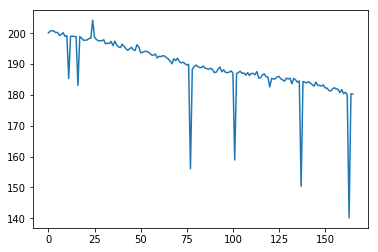

In [221]:
plt.plot(pressure)

In [223]:
date = pd.date_range(start='20100101', periods=days//30, freq='M')

In [224]:
data = {
    'Date': date,
    'Pressure': pressure,
}

df = pd.DataFrame(data)

Now we convert index to datetime. We'll call it `dp` for 'dataframe pressure'...

In [227]:
df['Date'] = pd.to_datetime(df['Date'])
dp = df.set_index('Date')

In [370]:
dp['TDelta'] = dp.index - dp.index[0]

In [371]:
dp.head()

,Pressure,TDelta
Date,,
2010-01-31,200.145264,0 days
2010-02-28,200.741315,28 days
2010-03-31,200.883907,59 days
2010-04-30,200.682596,89 days
2010-05-31,200.256364,120 days


## Make production dataframe

In [292]:
volume = np.linspace(40, 35, days+100) + np.random.normal(0, 0.75, days+100)

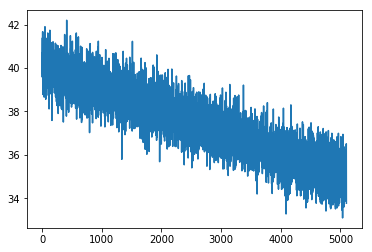

In [293]:
plt.plot(volume)

In [294]:
date = pd.date_range(start='20091001', periods=days+100, freq='D')

In [295]:
data = {
    'Date': date,
    'Volume': volume,
}

df = pd.DataFrame(data)

In [296]:
df.head(), df.tail()

(        Date     Volume
 0 2009-10-01  40.678710
 1 2009-10-02  40.521674
 2 2009-10-03  40.389623
 3 2009-10-04  40.006610
 4 2009-10-05  39.585621,            Date     Volume
 5095 2023-09-13  35.887283
 5096 2023-09-14  35.998204
 5097 2023-09-15  36.508308
 5098 2023-09-16  33.891823
 5099 2023-09-17  33.766821)

We'll drop some rows for fun:

Convert index to datetime and call it `dv` for 'dataframe volume'.

In [302]:
df['Date'] = pd.to_datetime(df['Date'])
dv = df.set_index('Date')

In [303]:
dv = dv.drop(dv.index[500:800])

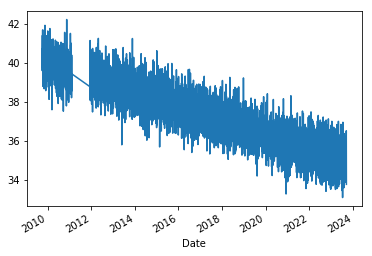

In [304]:
dv.Volume.plot()

## Inspect the data

In [301]:
dv.head()

,Volume
Date,
2009-10-01,40.678710
2009-10-02,40.521674
2009-10-03,40.389623
2009-10-04,40.006610
2009-10-05,39.585621


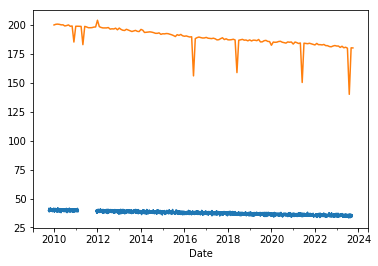

In [273]:
dv.Volume.plot()
dp.Pressure.plot()

## Resample data

We could upsample the pressure data:

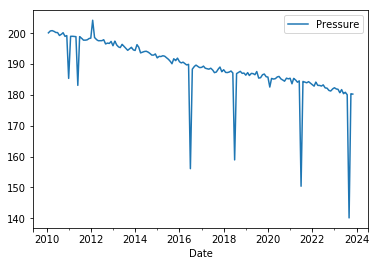

In [353]:
dp.resample('D').interpolate(method='linear').plot()

In [354]:
dp = dp.interpolate(method='time')
len(dp)

166

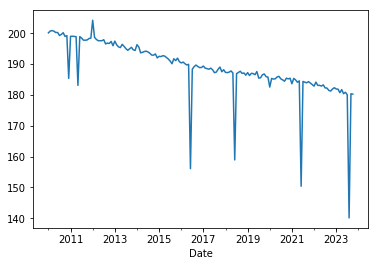

In [356]:
dp.Pressure.plot()

## Summaries over time

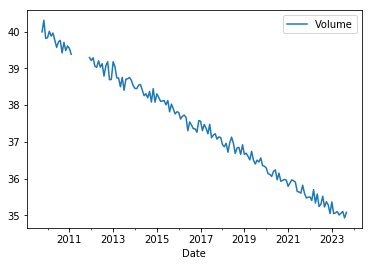

In [359]:
dv.resample('M').mean().plot()

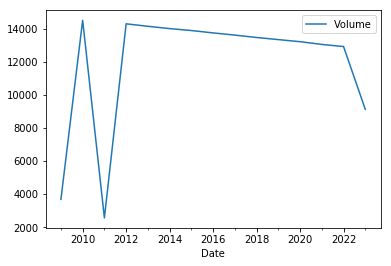

In [360]:
dv.resample('Y').sum().plot()

## Data for specific period

In [372]:
dv.head()


,Volume
Date,
2009-10-01,40.678710
2009-10-02,40.521674
2009-10-03,40.389623
2009-10-04,40.006610
2009-10-05,39.585621


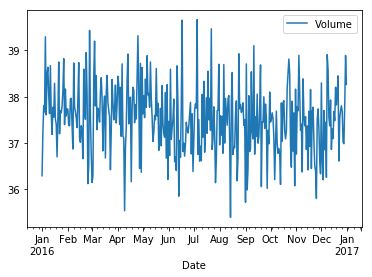

In [361]:
dv.loc['2016'].plot()

One month of data:

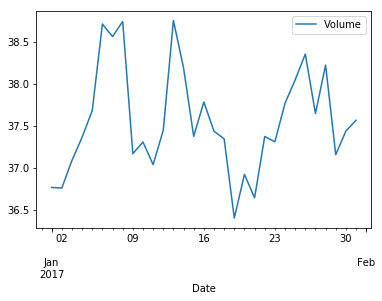

In [362]:
dv.loc['Jan 2017'].plot()

An arbitrary slilce of data:

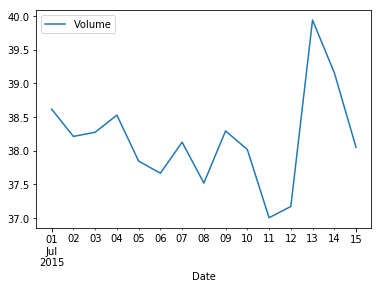

In [373]:
dv.loc['1 Jul 2015':'15 Jul 2015'].plot()

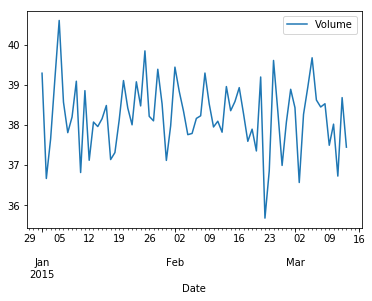

In [363]:
dv.loc['20150101':'20150313'].plot()